In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
train_dataset=pd.read_csv("train.csv")

## Data Profiling

In [ ]:
#question: “Does this feature separate survivors vs non-survivors?”

In [24]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_dataset.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [26]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [27]:
train_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
train_dataset["Sex"].unique()

array(['male', 'female'], dtype=object)

In [26]:
train_dataset.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Cabin       204
Embarked    889
dtype: int64

<Axes: >

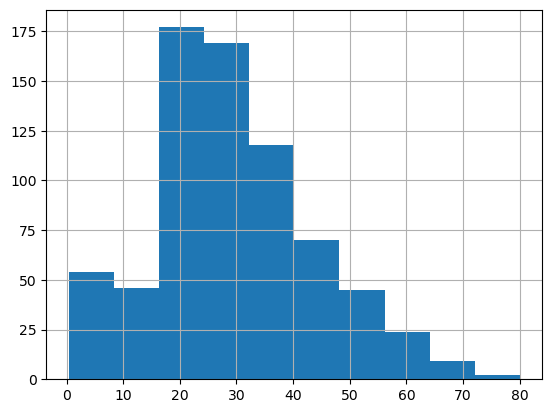

In [27]:
train_dataset["Age"].hist()

<Axes: >

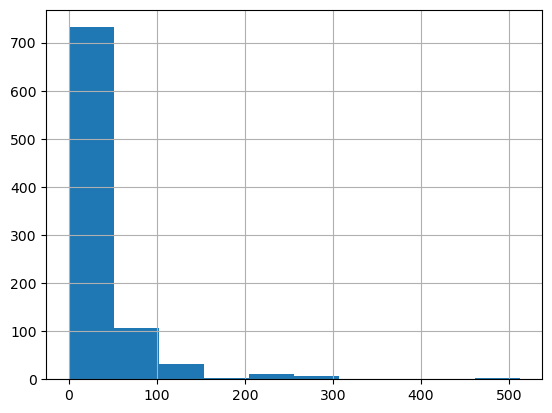

In [12]:
train_dataset["Fare"].hist()#y axis is count

<Axes: xlabel='Sex'>

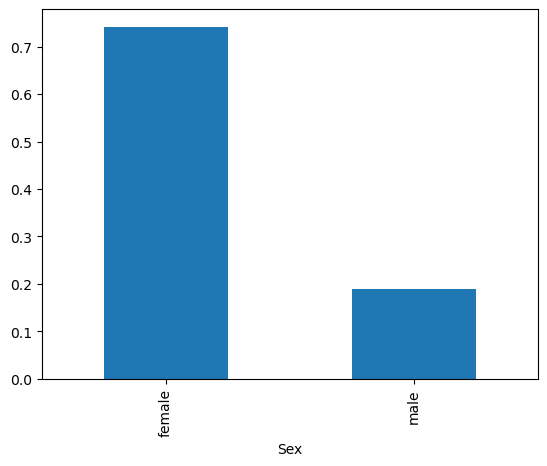

In [14]:
train_dataset.groupby("Sex")["Survived"].mean().plot(kind="bar")

<Axes: xlabel='Pclass'>

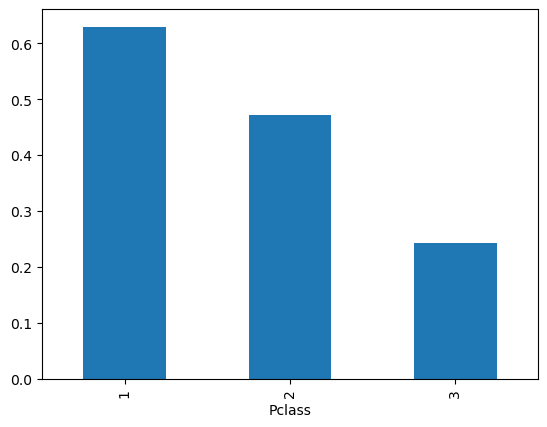

In [16]:
train_dataset.groupby("Pclass")["Survived"].mean().plot(kind="bar")

<Axes: xlabel='Pclass'>

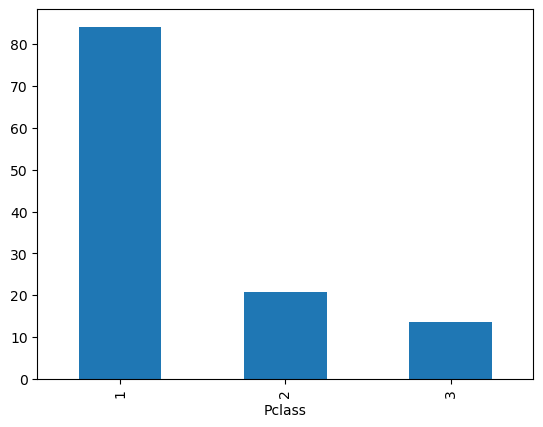

In [37]:
train_dataset.groupby("Pclass")["Fare"].mean().plot(kind="bar")

In [39]:
train_dataset.groupby("Pclass")["Age"].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

## Feature Engineering

In [4]:
test_dataset=pd.read_csv("test.csv")

## feature 1: family size

In [5]:
train_dataset["FamilySize"] = train_dataset["SibSp"] + train_dataset["Parch"] + 1
test_dataset["FamilySize"] = test_dataset["SibSp"] + test_dataset["Parch"] + 1

In [6]:
train_dataset["IsAlone"] = (train_dataset["FamilySize"] == 1).astype(int)
test_dataset["IsAlone"] = (test_dataset["FamilySize"] == 1).astype(int)

## feature 2: hot encoding

In [7]:
train_dataset["Sex"] = train_dataset["Sex"].map({"male": 0, "female": 1})
test_dataset["Sex"] = test_dataset["Sex"].map({"male": 0, "female": 1})

## feature 3: Fill missing values

In [8]:
train_dataset["Age"] = train_dataset.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))
test_dataset["Age"] = test_dataset.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

In [9]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1,1


In [34]:
train_dataset.count()

Survived      891
Pclass        891
Name          891
Sex           891
Age           891
SibSp         891
Parch         891
Fare          891
Cabin         204
Embarked      889
FamilySize    891
IsAlone       891
dtype: int64

## feature 4: Cabin

In [10]:
train_dataset["HasCabin"] = train_dataset["Cabin"].notnull().astype(int)
test_dataset["HasCabin"] = test_dataset["Cabin"].notnull().astype(int)

train_dataset["Deck"] = train_dataset["Cabin"].str[0]
test_dataset["Deck"] = test_dataset["Cabin"].str[0]

train_dataset["Deck"] = train_dataset["Deck"].fillna("Unknown")
test_dataset["Deck"] = test_dataset["Deck"].fillna("Unknown")

In [36]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,HasCabin,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,2,0,0,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,2,0,1,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,1,1,0,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,2,0,1,C
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1,1,0,Unknown


In [11]:
#changing deck from string to int
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_dataset["Deck"] = le.fit_transform(train_dataset["Deck"])
test_dataset["Deck"] = le.transform(test_dataset["Deck"])

In [12]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,HasCabin,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,2,0,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,2,0,1,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,1,1,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,2,0,1,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1,1,0,8


In [13]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,HasCabin,Deck
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2,0,0,8
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,8
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1,0,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3,0,0,8


In [40]:
test_dataset.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
FamilySize     418
IsAlone        418
HasCabin       418
Deck           418
dtype: int64

In [14]:
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].mean())

In [42]:
test_dataset.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin           91
Embarked       418
FamilySize     418
IsAlone        418
HasCabin       418
Deck           418
dtype: int64

In [43]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,HasCabin,Deck
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2,0,0,8
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,8
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1,0,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3,0,0,8


## feature 5: added to see if CV improves 

In [15]:
train_dataset["Title"] = train_dataset["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
test_dataset["Title"] = test_dataset["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

In [16]:
train_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [17]:
test_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [18]:
train_dataset["Title"] = train_dataset["Title"].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs"
})

test_dataset["Title"] = test_dataset["Title"].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs"
})

In [19]:
train_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

In [20]:
test_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [22]:
other = [
    "Lady", "Countess", "Capt", "Col", "Don", "Dr",
    "Major", "Rev", "Sir", "Jonkheer", "Dona"
]

train_dataset["Title"] = train_dataset["Title"].replace(other, "other")
test_dataset["Title"] = test_dataset["Title"].replace(other, "other")

In [23]:
train_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [24]:
test_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [25]:
train_dataset["Title"] = le.fit_transform(train_dataset["Title"])
test_dataset["Title"] = le.transform(test_dataset["Title"])

## Feature Selection

In [40]:
features = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "IsAlone","HasCabin","Deck","Title"]

## Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [42]:
X_train = train_dataset[features]
y_train = train_dataset["Survived"]
X_test = test_dataset[features]

In [43]:
model = RandomForestClassifier(
    n_estimators=300,  # number of trees
    max_depth=5,#added depth after 1st run. prevents overfitting. if depth was reasonable no CV gain
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

## validate

In [44]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

CV Accuracy Scores: [0.82122905 0.80337079 0.83707865 0.80337079 0.85393258]
Mean CV Accuracy: 0.8237963718536188


## check important features

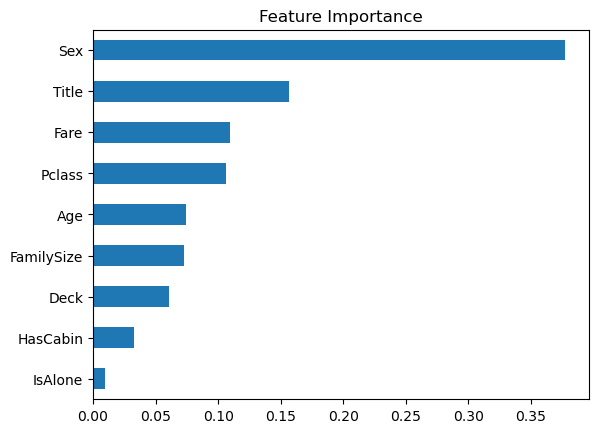

In [45]:
import matplotlib.pyplot as plt

importance = pd.Series(model.feature_importances_, index=features)
importance.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()

## On test data

In [46]:
predictions = model.predict(X_test)

In [47]:
output = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": predictions
})

In [48]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [49]:
output.to_csv("titanic_submission.csv", index=False)